In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("Boston.csv")


In [4]:

X = data.drop(['medv'], axis=1)
X = X.iloc[:, 1:]
y = (data['medv'] > data.median(axis=0)['medv']).astype(int)

In [5]:
X_train = X[0:450]
y_train = y[0:450]

X_test = X[450:]
y_test = y[450:]

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf25 = RandomForestClassifier(n_estimators=25, bootstrap=True, oob_score=True)
clf25 = clf25.fit(X_train, y_train)

clf500 = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True)
clf500 = clf500.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [8]:
from sklearn.metrics import mean_squared_error
print("25 trees mse")
print(mean_squared_error(y_test, clf25.predict(X_test)))
print("500 trees mse")
print(mean_squared_error(y_test, clf500.predict(X_test)))

25 trees mse
0.19642857142857142
500 trees mse
0.17857142857142858


In [9]:
import itertools
from itertools import combinations

# we could also use Exhaustive Feature Selector from mlxtend
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/
def best_subset_func(estimator, X, y, max_size=10, cv=5):
    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            predictions = estimator.fit(X_train.iloc[:, list(subset)], y_train).predict(X_test.iloc[:, list(subset)])
            # get the subset with the best score among subsets of the same size
            score = mean_squared_error(y_test, predictions)
            if score < best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)

    return best_size_subset


In [19]:
clf = RandomForestClassifier(n_estimators=15, bootstrap=True)

best_size_subset = best_subset_func(clf, X, y, max_size=15, cv=5)

KeyboardInterrupt: ignored

In [28]:
import math

# compare best subsets of each size
def calculate_best_score(estimator, X_train, y_train, best_size_subset, stepwise=False):
  best_score = np.inf

  best_subset = None
  list_scores = []

  for subset in best_size_subset:
    predictions = estimator.fit(X_train.iloc[:, list(subset)], y_train).predict(X_test.iloc[:, list(subset)])
    score = mean_squared_error(y_test, predictions)

    if score < best_score:
      best_score, best_subset = score, subset
    
    list_scores.append(score)
  
  return best_subset, best_score, list_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

[(1, 6, 11, 12), 0.16071428571428573]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


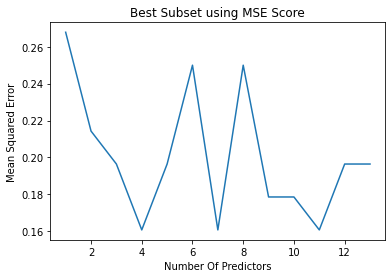

In [29]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

clf = RandomForestClassifier(n_estimators=30, bootstrap=True, oob_score=True)

best_subset, best_score, list_scores = calculate_best_score(clf, X_train, y_train, best_size_subset)

plt.plot(np.arange(1, X.shape[1]+1), list_scores)
plt.ylabel("Mean Squared Error")
plt.xlabel("Number Of Predictors")
plt.title("Best Subset using MSE Score")

print([best_subset, best_score])

In [30]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [26]:

# compare different tree sizes
best_tree_score = np.inf
best_tree_size = None
list_tree_scores = []

maxTreeSize = 200

for a in range(1, maxTreeSize):
  clf = RandomForestClassifier(n_estimators=a, bootstrap=True, oob_score=True)

  predictions = clf.fit(X_train, y_train).predict(X_test)
  score = mean_squared_error(y_test, predictions)
  if score < best_tree_score:
    best_tree_score, best_tree_size = score, a
    
  list_tree_scores.append(score)
  


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier w

0.125 2


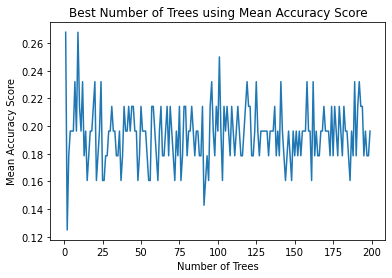

In [32]:
plt.plot(np.arange(1, maxTreeSize), list_tree_scores)
plt.ylabel("Mean Accuracy Score")
plt.xlabel("Number of Trees")
plt.title("Best Number of Trees using Mean Accuracy Score")

print(best_tree_score, best_tree_size)